In [1]:
# Importing the required libraries
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline

In [2]:
# Reading the csv file and putting it into 'df' object.
df = pd.read_csv('heart_v2.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   age            270 non-null    int64
 1   sex            270 non-null    int64
 2   BP             270 non-null    int64
 3   cholestrol     270 non-null    int64
 4   heart disease  270 non-null    int64
dtypes: int64(5)
memory usage: 10.7 KB


In [3]:
df.columns

Index(['age', 'sex', 'BP', 'cholestrol', 'heart disease'], dtype='object')

In [4]:
df.head()

,age,sex,BP,cholestrol,heart disease
0,70,1,130,322,1
1,67,0,115,564,0
2,57,1,124,261,1
3,64,1,128,263,0
4,74,0,120,269,0


In [5]:
df['heart disease'].value_counts()

0    150
1    120
Name: heart disease, dtype: int64

In [6]:
# Putting feature variable to X
X = df.drop('heart disease',axis=1)

# Putting response variable to y
y = df['heart disease']

In [7]:
%pip install sklearn

  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2959 sha256=7d533c06bf8333e5fb5c620eef086da13e11c9b1046eda6aa456b200f1670b35
  Stored in directory: c:\users\micke\appdata\local\pip\cache\wheels\f8\e0\3d\9d0c2020c44a519b9f02ab4fa6d2a4a996c98d79ab2f569fa1
Successfully built sklearn
Note: you may need to restart the kernel to use updated packages.


    ERROR: Command errored out with exit status 1:
     command: 'C:\Users\micke\anaconda3\python.exe' -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\micke\\AppData\\Local\\Temp\\pip-install-9f1isw02\\sklearn_5fde836a43754c1a8a9ed962c388c5c3\\setup.py'"'"'; __file__='"'"'C:\\Users\\micke\\AppData\\Local\\Temp\\pip-install-9f1isw02\\sklearn_5fde836a43754c1a8a9ed962c388c5c3\\setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' egg_info --egg-base 'C:\Users\micke\AppData\Local\Temp\pip-pip-egg-info-6ygqr93e'
         cwd: C:\Users\micke\AppData\Local\Temp\pip-install-9f1isw02\sklearn_5fde836a43754c1a8a9ed962c388c5c3\
    Complete output (7 lines):
    Traceback (most recent call last):
      File "<string>", line 1, in <module>
      File "C:\U

In [8]:
import sklearn
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=16)
X_train.shape, X_test.shape

((189, 4), (81, 4))

Fitting the decision tree with default hyperparameters, apart from max_depth which is 3 so that we can plot and read the tree.

In [10]:
from sklearn.tree import DecisionTreeClassifier

In [11]:
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [12]:
!pip install six

In [13]:
%pip install pydotplus

Note: you may need to restart the kernel to use updated packages.


In [14]:
%pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [15]:
# Importing required packages for visualization
from IPython.display import Image  
from six import StringIO
from sklearn.tree import export_graphviz
import pydotplus, graphviz

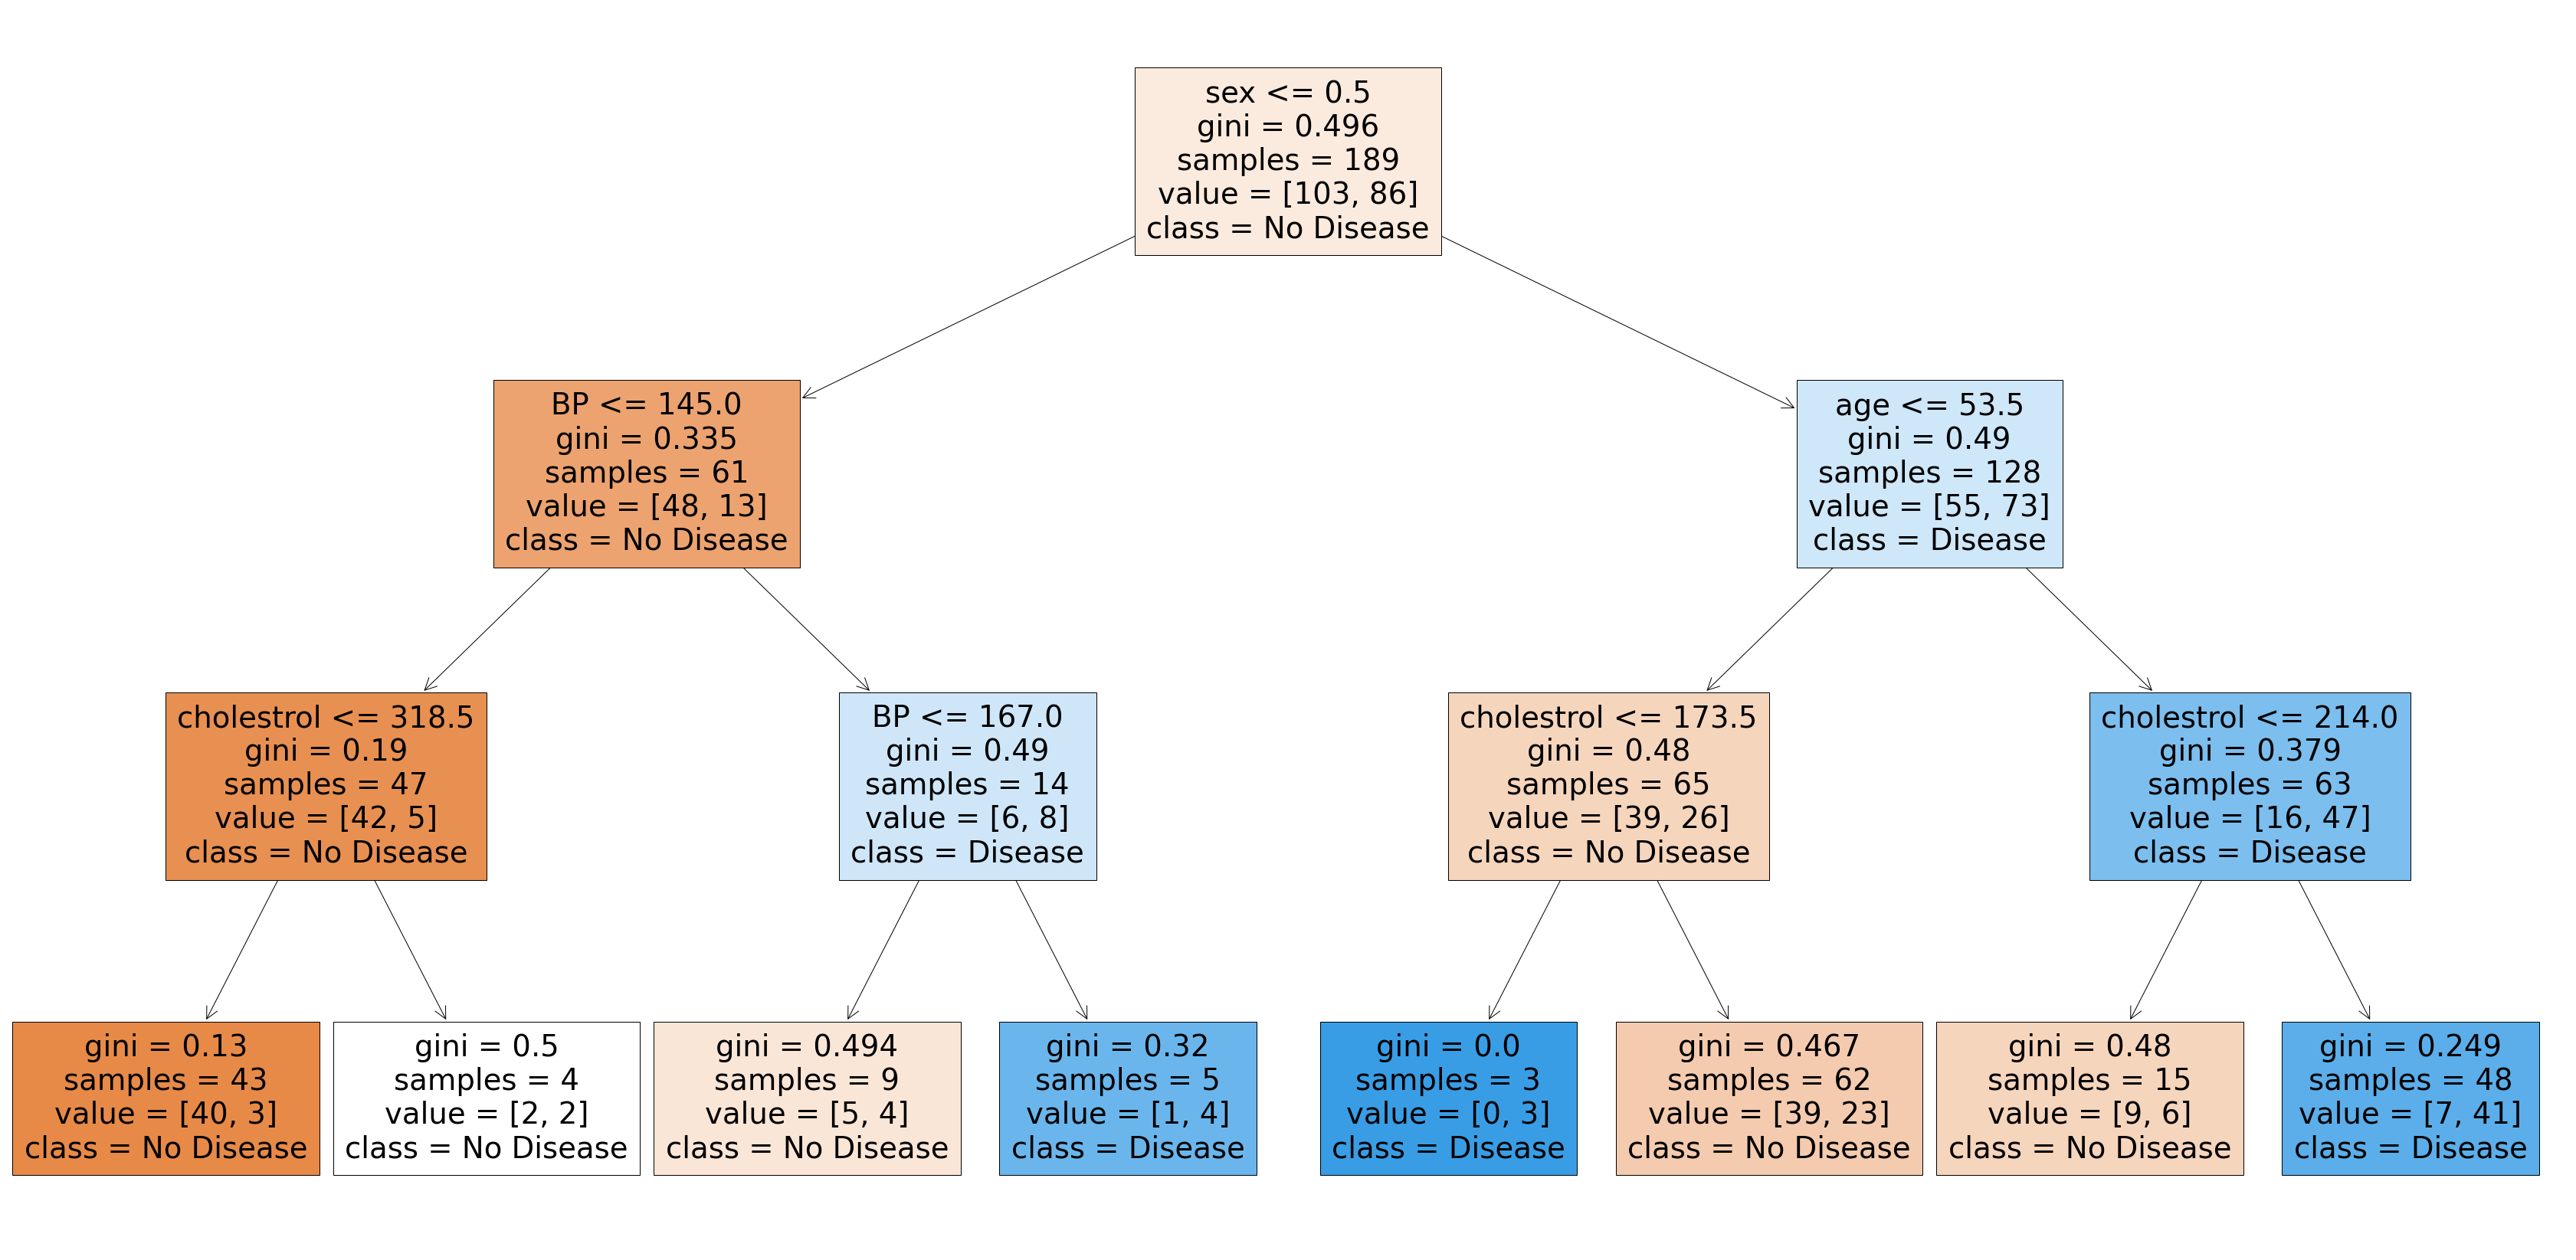

In [17]:
# plotting tree with max_depth=3
from sklearn.tree import plot_tree
plt.figure(figsize=(60,30))
plot_tree(dt, feature_names = X.columns,class_names=['No Disease', "Disease"],filled=True);

#### Evaluating model performance

In [18]:
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

In [19]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [20]:
print(accuracy_score(y_train, y_train_pred))
confusion_matrix(y_train, y_train_pred)

0.7566137566137566


array([[95,  8],
       [38, 48]], dtype=int64)

In [21]:
print(accuracy_score(y_test, y_test_pred))
confusion_matrix(y_test, y_test_pred)

0.6049382716049383


array([[33, 14],
       [18, 16]], dtype=int64)